# Loss clock

## Introduction

We continue to characterize the highly correlated group of CpGs (see `Epigenomic-scores` notebook) we termed __loss clock__. 

## Initialize

In [26]:
source(here::here("scripts/init.R"))

## Plot methylation distribution of the clock

In [3]:
df_sum <- fread(here("data/epigenomic_features_raw_meth.tsv")) %>% filter(!is.na(ER)) %>% as_tibble() 

#### Figure 1i

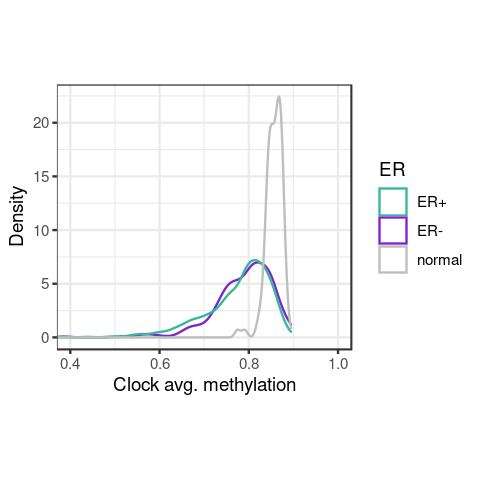

In [4]:
options(repr.plot.width = 4, repr.plot.height = 4)
p_avg_clock <- df_sum %>%         
    ggplot(aes(x=clock, color=ER)) + 
        geom_density() + 
        scale_color_manual(values = annot_colors$ER1) + 
        theme(aspect.ratio = 1) + 
        ylab("Density") + 
        xlab("Clock avg. methylation") + 
        coord_cartesian(xlim=c(0.4, 1))

p_avg_clock + theme_bw() + theme(aspect.ratio = 0.9)    

In [5]:
ks.test(df_sum[df_sum$ER == "ER+", ]$clock, df_sum[df_sum$ER == "normal", ]$clock)
ks.test(df_sum[df_sum$ER == "ER-", ]$clock, df_sum[df_sum$ER == "normal", ]$clock)


	Two-sample Kolmogorov-Smirnov test

data:  df_sum[df_sum$ER == "ER+", ]$clock and df_sum[df_sum$ER == "normal", ]$clock
D = 0.73803, p-value < 2.2e-16
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  df_sum[df_sum$ER == "ER-", ]$clock and df_sum[df_sum$ER == "normal", ]$clock
D = 0.68317, p-value < 2.2e-16
alternative hypothesis: two-sided


## Annotate "clock" score

### Loci annotation

In [7]:
loci_annot <- fread(here("data/loci_annot_epigenomic_features.tsv")) %>% as_tibble()

In [8]:
cor_thresh <- 0.6

#### Figure 1k

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 21 rows containing non-finite values (stat_density).”


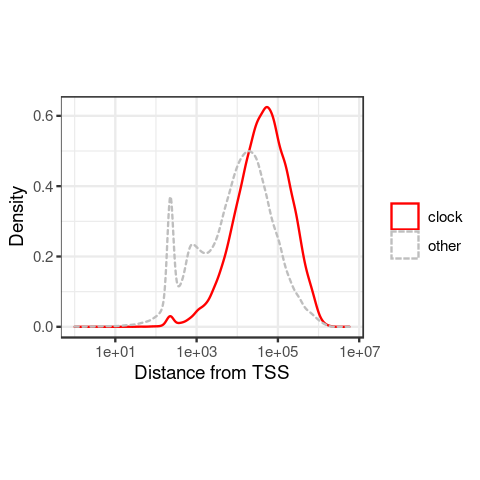

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)
p_tss_d <- loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    ggplot(aes(x=abs(tss_d), color=type, linetype = type)) + 
    geom_density() + 
    xlab("Distance from TSS") + 
    ylab("Density") + 
    scale_color_manual(name = "", values=c(clock = "red", other = "gray")) + 
    scale_x_log10(label=scales::scientific) + 
    scale_linetype_manual(name = "", values=c(clock = "solid", other = "dashed")) + 
    theme(aspect.ratio = 0.8)

p_tss_d + theme_bw() + theme(aspect.ratio = 0.8)

In [10]:
loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    summarise(pval = ks.test(abs(tss_d)[type == "clock"], abs(tss_d)[type == "other"])$p.value)

Warning message in ks.test(abs(tss_d)[type == "clock"], abs(tss_d)[type == "other"]):
“p-value will be approximate in the presence of ties”


pval
<dbl>
0


#### Figure 1l

Warning message:
“Removed 28 rows containing non-finite values (stat_density).”


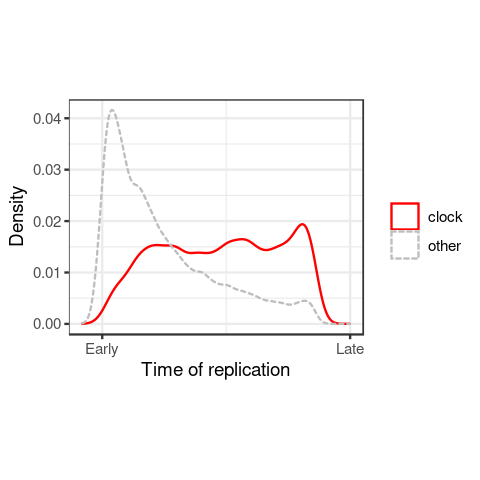

In [11]:
options(repr.plot.width = 4, repr.plot.height = 4)
p_tor <- loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    ggplot(aes(x=-tor, color=type, linetype = type)) + 
    geom_density() + 
    xlab("Time of replication") + 
    ylab("Density") + 
    scale_color_manual(name = "", values=c(clock = "red", other = "gray")) + 
    scale_x_continuous(breaks = c(-80, 0), labels = c("Early", "Late")) + 
    scale_linetype_manual(name = "", values=c(clock = "solid", other = "dashed")) + 
    theme(aspect.ratio = 0.8)

p_tor  + theme_bw() + theme(aspect.ratio = 0.8)

In [12]:
loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    summarise(pval = ks.test(-tor[type == "clock"], -tor[type == "other"])$p.value)

Warning message in ks.test(-tor[type == "clock"], -tor[type == "other"]):
“p-value will be approximate in the presence of ties”


pval
<dbl>
0


#### Extended Data Figure 4d

Warning message:
“Removed 8 rows containing non-finite values (stat_density).”


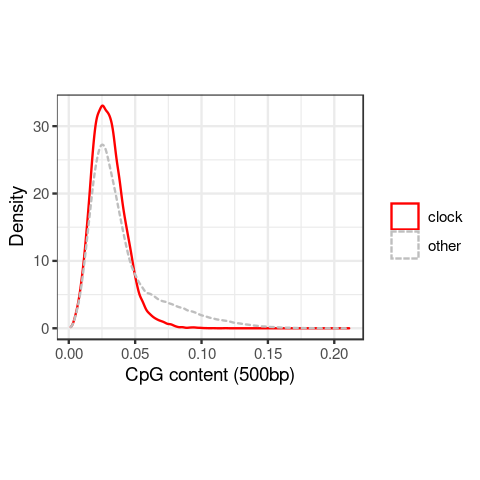

In [13]:
options(repr.plot.width = 4, repr.plot.height = 4)
p_cg_cont_d <- loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    ggplot(aes(x=cg_cont, color=type, linetype = type)) + 
    geom_density() + 
    xlab("CpG content (500bp)") + 
    ylab("Density") + 
    scale_color_manual(name = "", values=c(clock = "red", other = "gray")) + 
    scale_linetype_manual(name = "", values=c(clock = "solid", other = "dashed")) + 
    theme(aspect.ratio = 0.8)

p_cg_cont_d + theme_bw() + theme(aspect.ratio = 0.8)

In [14]:
loci_annot %>% 
    mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>% 
    summarise(pval = ks.test(cg_cont[type == "clock"], cg_cont[type == "other"])$p.value)

Warning message in ks.test(cg_cont[type == "clock"], cg_cont[type == "other"]):
“p-value will be approximate in the presence of ties”


pval
<dbl>
0


#### Extended Data Figure 4c

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


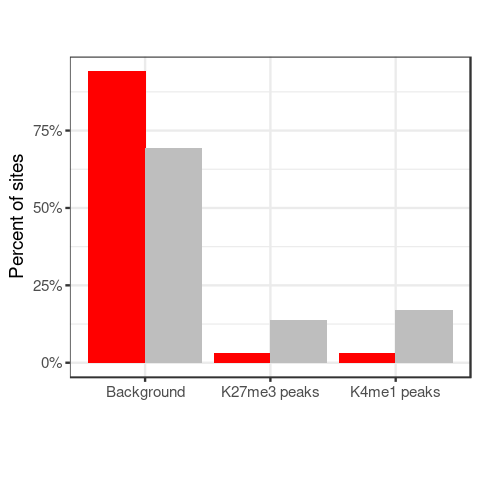

In [15]:
options(repr.plot.width = 4, repr.plot.height = 4)

k4me1_names <- grep("k4me1", colnames(loci_annot))

clock_loci_annot <- loci_annot %>%
        mutate(type = ifelse(clock >= cor_thresh, "clock", "other")) %>%
        mutate(
            enh = matrixStats::rowAnys((loci_annot[, k4me1_names] > 0.97), na.rm = TRUE),
            polycomb = k27me3 > 0.97
        ) %>%
        mutate(context = case_when(polycomb ~ "K27me3 peaks", enh ~ "K4me1 peaks", TRUE ~ "Background"))

p_enh_polycomb <- clock_loci_annot %>%
        count(type, context) %>%
        group_by(type) %>%
        mutate(frac = n / sum(n)) %>%
        ggplot(aes(x = context, y = frac, fill = type)) +
        geom_col(position = "dodge") +
        scale_fill_manual("", values = c(other = "gray", clock = "red")) +
        scale_y_continuous(label = function(x) scales::percent(x, accuracy = 1)) +
        ylab("Percent of sites") +
        xlab("") +
        guides(fill = FALSE) +
        vertical_labs() +
        theme(aspect.ratio = 0.8)
                           
p_enh_polycomb + theme_bw() + theme(aspect.ratio = 0.8)

In [16]:
chisq.test(clock_loci_annot$type, clock_loci_annot$context)


	Pearson's Chi-squared test

data:  clock_loci_annot$type and clock_loci_annot$context
X-squared = 4794, df = 2, p-value < 2.2e-16


### Clinical annotation

In [17]:
feats <- fread(here("data/epigenomic_features.tsv")) %>% 
        mutate(ML = -ML, clock = -clock, immune.meth = -immune.meth, caf.meth = -caf.meth) %>% as_tibble()
nbins <- 5
df <- feats %>% 
    mutate(
        clock = cut(clock, quantile(clock, 0:nbins/nbins, na.rm=TRUE), include.lowest=TRUE, labels=1:nbins)) %>% 
    left_join(samp_data %>% select(samp, stage, grade), by = "samp") %>% 
    mutate(stage = ifelse(stage %in% c(0, "DCIS", 1), "0-1", stage)) %>% 
    mutate(stage = ifelse(ER == "normal", "N", stage)) %>% 
    mutate(grade = ifelse(ER == "normal", "N", grade))

In [18]:
df_pval <- df %>% filter(ER %in% c("ER+", "ER-")) %>% gather("feat", "bin", -samp, -ER, -stage, -grade) %>% filter(feat == "clock") %>% group_by(ER, feat) %>% summarise(grade_pval = chisq.test(bin, grade)$p.value, stage_pval = chisq.test(bin, stage)$p.value) 
as.data.frame(df_pval)
df_pval %>% filter(grade_pval <= 0.05)
df_pval %>% filter(stage_pval <= 0.05)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
Warning message in chisq.test(bin, grade):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(bin, stage):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(bin, stage):
“Chi-squared approximation may be incorrect”


ER,feat,grade_pval,stage_pval
<chr>,<chr>,<dbl>,<dbl>
ER-,clock,0.6348596,0.07094066
ER+,clock,0.1471181,0.57227178


ER,feat,grade_pval,stage_pval
<chr>,<chr>,<dbl>,<dbl>


ER,feat,grade_pval,stage_pval
<chr>,<chr>,<dbl>,<dbl>


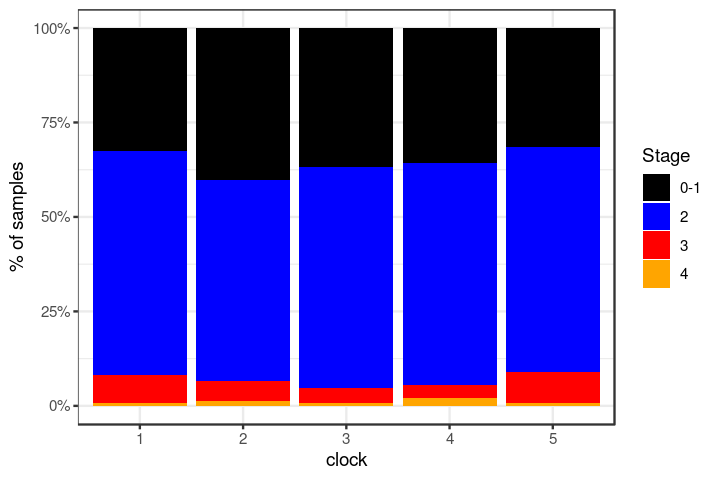

In [22]:
options(repr.plot.width = 6, repr.plot.height = 4)
p_stage_clock <- df %>% 
    filter(ER == "ER+") %>%
    mutate(stage = factor(stage, levels = c("N", "0-1", "2", "3", "4"))) %>% 
    filter(!is.na(stage)) %>% 
    count(stage, clock) %>% 
    group_by(clock) %>% 
    mutate(p = n / sum(n)) %>% 
    ggplot(aes(x=clock, y=p, fill=stage)) + 
        geom_col() + 
        scale_fill_manual(name = "Stage", values = c("N" = "gray", "0-1" = "black", "2" = "blue", "3" = "red", "4" = "orange")) + 
        scale_y_continuous(labels=scales::percent) + 
        ylab("% of samples")

p_stage_clock + theme_bw()

#### Figure 1j

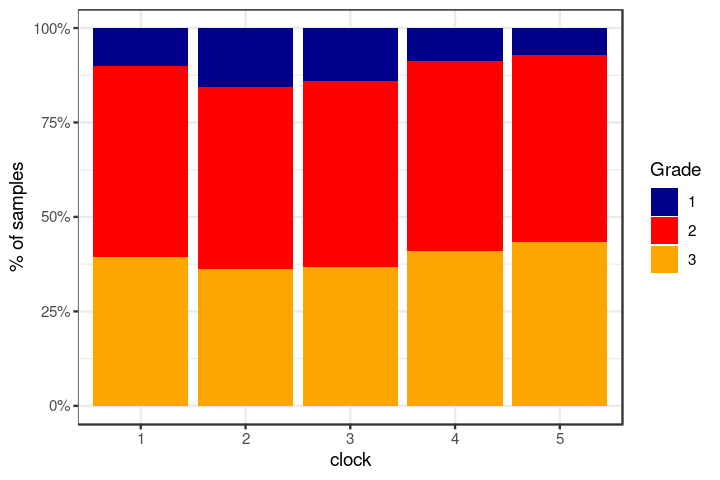

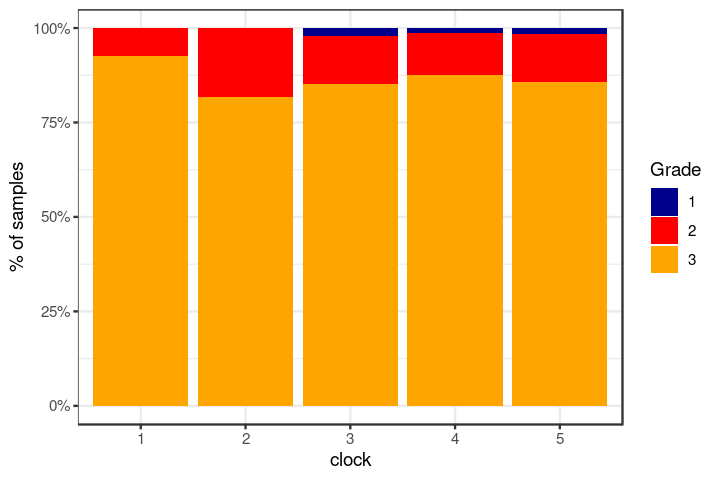

In [23]:
options(repr.plot.width = 6, repr.plot.height = 4)
p_grade_clock_positive <- df %>% 
    filter(ER == "ER+") %>%
    mutate(grade = factor(grade, levels = c("N", "1", "2", "3"))) %>% 
    filter(!is.na(grade)) %>% 
    count(grade, clock) %>% 
    group_by(clock) %>% 
    mutate(p = n / sum(n)) %>% 
    ggplot(aes(x=clock, y=p, fill=grade)) + 
        geom_col() + 
        scale_fill_manual(name = "Grade", values = c("N" = "gray", "1" = "darkblue", "2" = "red", "3" = "orange")) + 
        scale_y_continuous(labels=scales::percent) + 
        ylab("% of samples")

p_grade_clock_negative <- df %>% 
    filter(ER == "ER-") %>%
    mutate(grade = factor(grade, levels = c("N", "1", "2", "3"))) %>% 
    filter(!is.na(grade)) %>% 
    count(grade, clock) %>% 
    group_by(clock) %>% 
    mutate(p = n / sum(n)) %>% 
    ggplot(aes(x=clock, y=p, fill=grade)) + 
        geom_col() + 
        scale_fill_manual(name = "Grade", values = c("N" = "gray", "1" = "darkblue", "2" = "red", "3" = "orange")) + 
        scale_y_continuous(labels=scales::percent) + 
        ylab("% of samples")

p_grade_clock_positive + theme_bw()
p_grade_clock_negative + theme_bw()

## Plot chromosomal traces of clock score

We separate the samples to tumors with high and low clock score (top and bottom 30%). We then look at average methylation in bins of 10K along the chromosome. \
We smooth the methylation traces with rolling average of 50 bins. 

#### Figure 1m

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 147 row(s) containing missing values (geom_path).”
Coordinate system already present. Adding new coordinate system, which will replace the existing one.



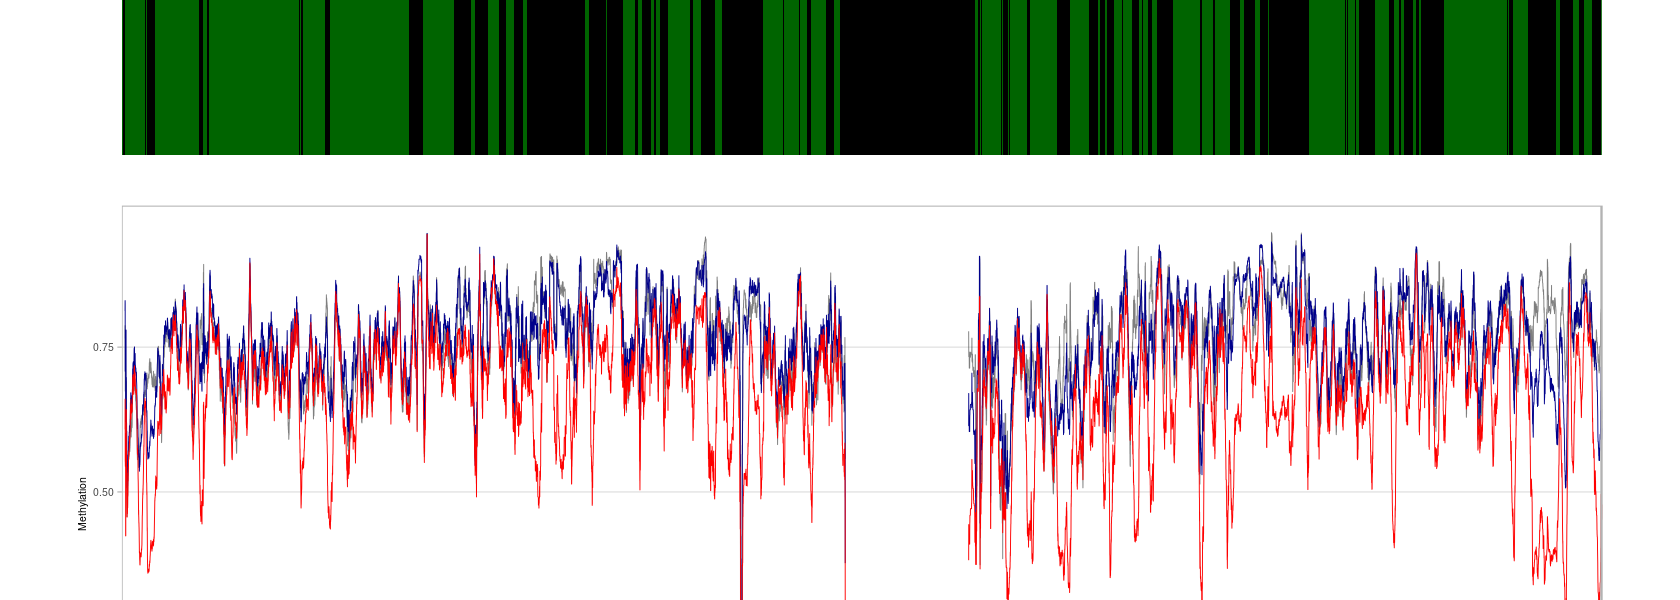

In [22]:
options(repr.plot.width = 14, repr.plot.height = 5)
p_trace <- plot_tor_clock_chrom_track("chr1", "ER+", iterator=1e4)
p_trace$p + coord_cartesian(ylim = c(0.25, 0.77))

#### Extended Data Figure 4f

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 147 row(s) containing missing values (geom_path).”
Coordinate system already present. Adding new coordinate system, which will replace the existing one.



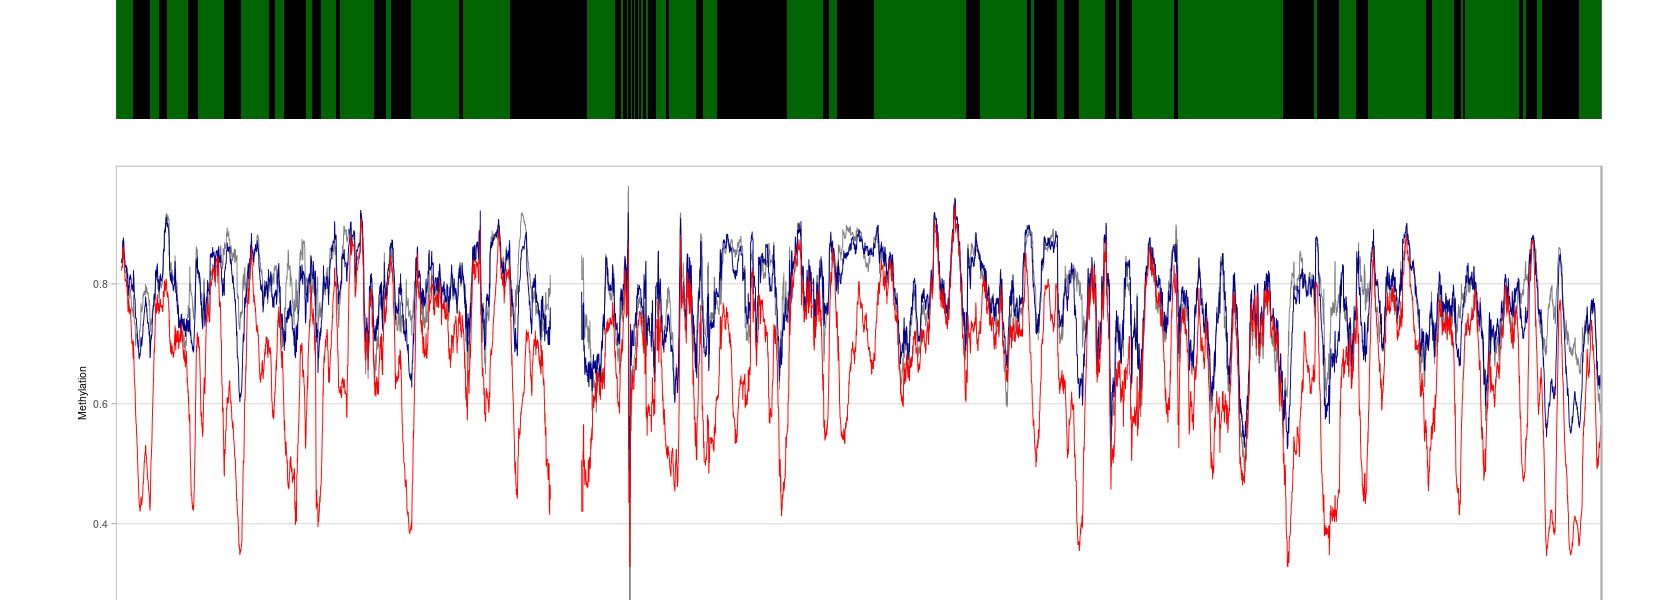

In [23]:
options(repr.plot.width = 14, repr.plot.height = 5)
p_trace_chr10 <- plot_tor_clock_chrom_track("chr10", "ER+", iterator=1e4)
p_trace_chr10$p + coord_cartesian(ylim = c(0.1, 0.77))

## Correlation of gene expression to clock

We calculate the correlation of all the genes to the clock score.

In [29]:
feat_gene_cors <- get_expression_features_cors()

#### Extended Data Figure 5a

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


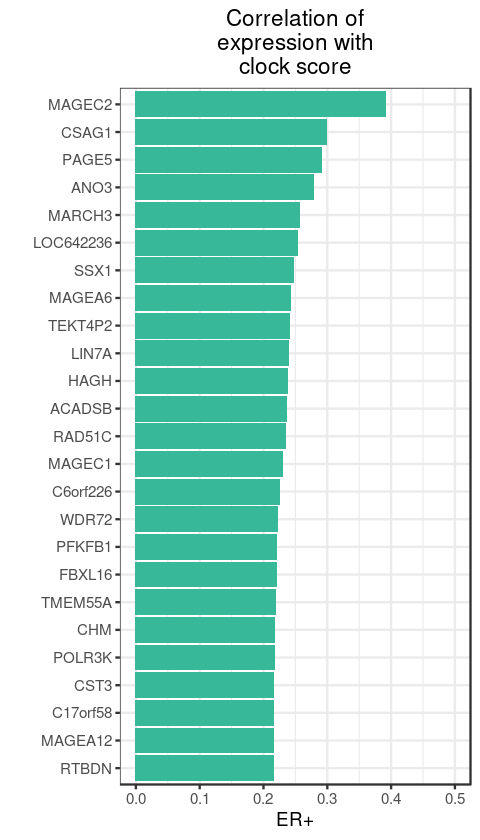

In [30]:
options(repr.plot.width = 4, repr.plot.height = 7)

top_genes <- feat_gene_cors %>%
    filter(ER == "ER+") %>%
    arrange(-clock) %>%
    slice(1:25)
p_top_genes <- top_genes %>%
    ggplot(aes(x = reorder(name, clock), y = clock, fill = ER)) +
    geom_col() +
    scale_fill_manual("", values = annot_colors$ER1) +
    guides(fill = "none") +
    ylim(0, 0.5) +
    xlab("") +
    ylab("ER+") + 
    coord_flip() + 
    ggtitle("Correlation of\nexpression with\nclock score") + 
    theme(plot.title = element_text(hjust = 0.5))    

p_top_genes + theme_bw() + theme(plot.title = element_text(hjust = 0.5))    

#### Extended Data Figure 5b

In [31]:
gene_feat_df <- get_gene_features_df(c("MAGEC2", "PAGE5")) %>% filter(!is.na(clock))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


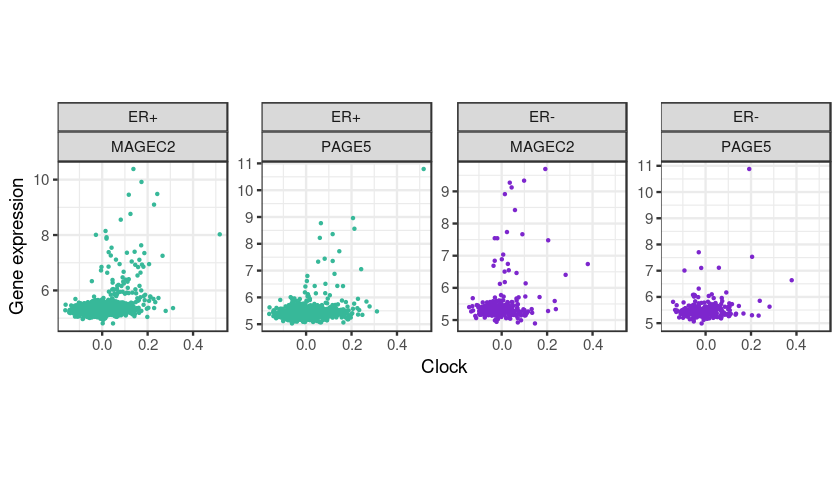

In [32]:
options(repr.plot.width = 7, repr.plot.height = 4)
p_mage_page <- gene_feat_df %>%         
        filter(ER != "normal") %>% 
        mutate(ER = factor(ER, levels=c("ER+", "ER-"))) %>% 
        ggplot(aes(x=clock, y=expr, color=ER)) + 
            geom_point(size=0.2) +             
            xlab("Clock") + 
            scale_color_manual(values=annot_colors$ER1) + 
            ylab("Gene expression") + 
            facet_wrap(ER~name, scales="free_y", nrow=1) +             
            theme(aspect.ratio = 1) + 
            guides(color="none")
p_mage_page + theme_bw() + theme(aspect.ratio = 1)

## Plot score in different TOR regimes

In [33]:
all_mat_raw <- get_all_meth() %>% intervs_to_mat()

In [34]:
tor_strata <- loci_annot %>% mutate(tor_strata = cut(tor, breaks = main_config$genomic_regions$tor_low_mid_high, labels=c("late", "intermediate", "early"))) %>% pull(tor_strata) %>% forcats::fct_explicit_na()

In [35]:
samp_meth_tor <- tgs_matrix_tapply(t(all_mat_raw), tor_strata, mean, na.rm=TRUE) %>% t() %>% as.data.frame() %>% rownames_to_column("samp") %>% add_ER() %cache_df% here("data/samp_meth_tor.tsv") %>% as_tibble()

#### Extended Data Figure 4e

cor_early_late,cor_early_mid
<dbl>,<dbl>
0.5723737,0.7680809


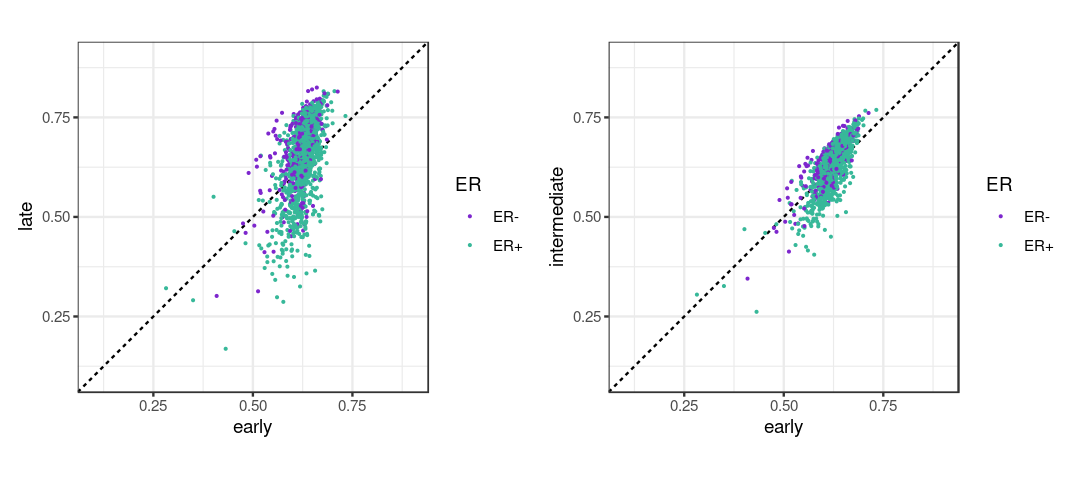

In [54]:
options(repr.plot.width = 9, repr.plot.height = 4)
p_early_late <- samp_meth_tor %>% 
    filter(ER != "normal") %>% 
    ggplot(aes(x=early, y=late, color=ER)) + 
        geom_abline(linetype = "dashed") + 
        geom_point(size=0.1) + 
        xlim(0.1, 0.9) + 
        ylim(0.1, 0.9) + 
        scale_color_manual(values=annot_colors$ER1) +         
        theme(aspect.ratio = 1) 

p_mid_early <- samp_meth_tor %>% 
    filter(ER != "normal") %>% 
    ggplot(aes(x=early, y=intermediate, color=ER)) + 
        geom_abline(linetype = "dashed") + 
        geom_point(size=0.1) + 
        xlim(0.1, 0.9) + 
        ylim(0.1, 0.9) + 
        scale_color_manual(values=annot_colors$ER1) +         
        theme(aspect.ratio = 1) 

samp_meth_tor %>% filter(ER != "normal") %>% summarise(cor_early_late = cor(early, late, method = "spearman", use = "pairwise.complete.obs"), cor_early_mid = cor(early, intermediate, method = "spearman", use = "pairwise.complete.obs"))

(p_early_late + theme_bw() + theme(aspect.ratio = 1) ) + (p_mid_early + theme_bw() + theme(aspect.ratio = 1) )

## Plot High-Low clock tumors vs TOR

#### Extended Data Figure 4g

[1] -0.6187326

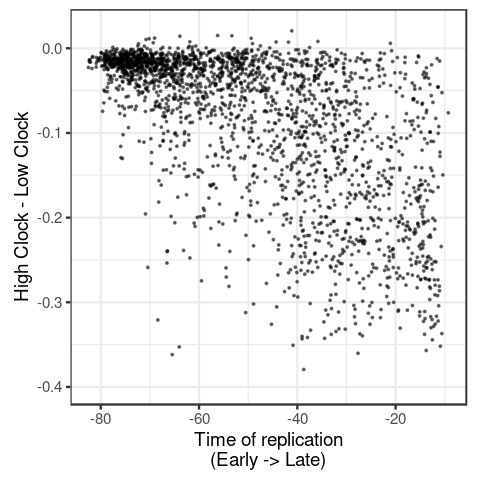

In [36]:
options(repr.plot.width = 4, repr.plot.height = 4)

df <- get_tor_clock_chrom_trace("chr1", "ER+", 1e5) %>% 
    filter(high_loss_n >= 50, low_loss_n >= 50) %>% 
    filter(!is.na(tor), !is.na(high_loss), !is.na(low_loss)) 

cor(-df$tor, df$high_loss - df$low_loss, method = "spearman")

p_tor_high_low <- df %>%     
    ggplot(aes(x = -tor, y = high_loss - low_loss)) +
        geom_point(size=0.05, alpha=0.5) + 
        theme(aspect.ratio = 1) +
        ylim(-0.4, 0.025) + 
        xlab("Time of replication\n(Early -> Late)") +
        ylab("High Clock - Low Clock") 

p_tor_high_low + theme_bw() + theme(aspect.ratio = 1)

## Plot correlation of loci to clock methylation

#### Extended Data Figure 4h

Joining, by = c("chrom", "start", "end")



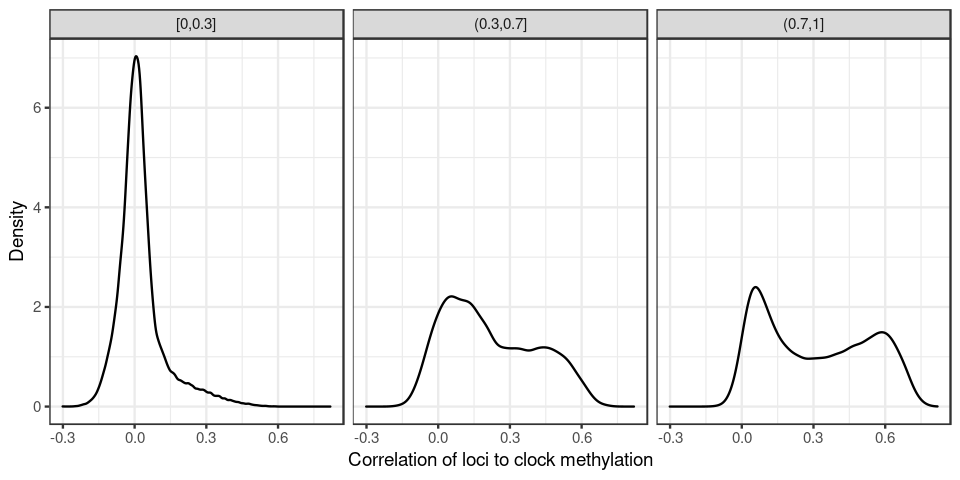

In [56]:
options(repr.plot.width = 8, repr.plot.height = 4)
p_loci_cor <- loci_annot %>% 
    left_join(get_all_summary_meth()) %>% 
    mutate(normal_meth = cut(normal, c(0,0.3,0.7,1), include.lowest=TRUE)) %>% 
    ggplot(aes(x=clock)) + 
    geom_density() + 
    facet_grid(.~normal_meth) + 
    ylab("Density") + 
    xlab("Correlation of loci to clock methylation")

p_loci_cor + theme_bw()

## Plot distribution of methylation of clock in normal samples

In [37]:
normal_mat <- get_all_meth() %>% 
    select(chrom:end, any_of(normal_samples)) %>% 
    intervs_to_mat()
loci_annot_f <- loci_annot %>% 
    filter(cg_cont <= 0.02) %>% 
    mutate(tor = cut(tor, breaks=main_config$genomic_regions$tor_low_mid_high, labels=c("late", "mid", "early"), include.lowest=TRUE)) %>% mutate(tor = forcats::fct_explicit_na(tor)) %>% 
    intervs_to_mat()
normal_clock <- tgs_matrix_tapply(t(normal_mat[rownames(loci_annot_f), ]), loci_annot_f[, "tor"], mean, na.rm=TRUE) %>% 
    t() %>% 
    as.data.frame() %>% 
    rownames_to_column("samp") %>% 
    as_tibble() 
nrow(loci_annot_f)

[1] 36420

#### Extended Data Figure 5b

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


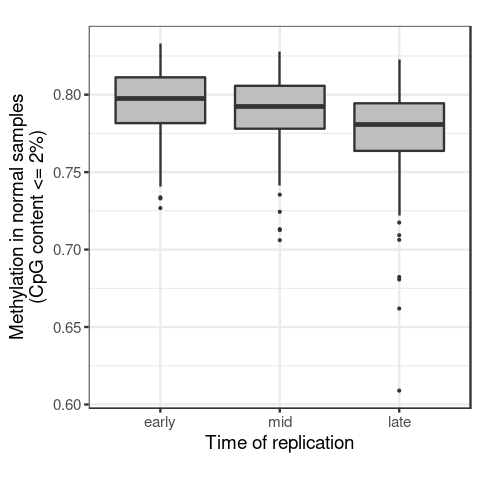

In [38]:
options(repr.plot.width = 4, repr.plot.height = 4)
df <- normal_clock %>% 
    gather("tor", "meth", -samp) %>% 
    mutate(tor = factor(tor, levels = c("early", "mid", "late"))) %>%
    filter(!is.na(tor)) %>% 
    mutate(ER = "normal")

p_clock_normal <- df %>% 
        ggplot(aes(x = tor, y = meth, fill = ER)) +
        geom_boxplot(outlier.size=0.1, lwd = 0.5) +
        scale_fill_manual(values = annot_colors$ER1) +
        theme(aspect.ratio = 1) +
        guides(fill = FALSE) +
        xlab("Time of replication") +
        vertical_labs() +
        ylab("Methylation in normal samples\n(CpG content <= 2%)")

p_clock_normal + theme_bw() + theme(aspect.ratio = 1)

## Compare clock layer to biological age

#### Extended Data Figure 5c

Joining, by = "samp"



cor
<dbl>
0.06042711


Warning message:
“Removed 30 rows containing missing values (geom_point).”


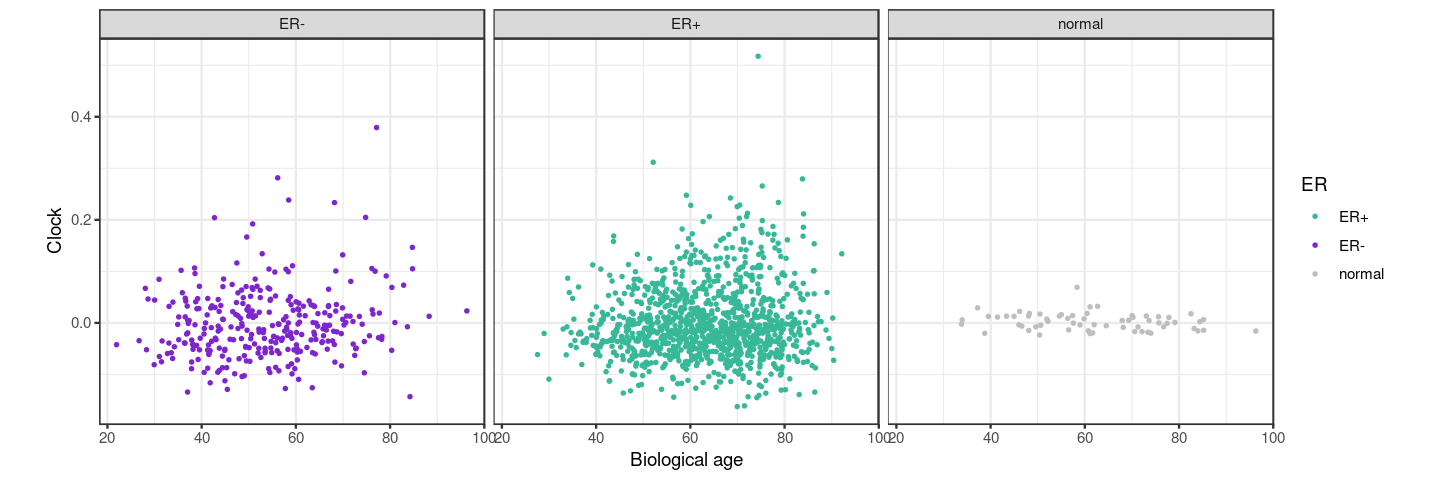

In [41]:
options(repr.plot.width = 12, repr.plot.height = 4)
df <- feats %>% 
    left_join(samp_data %>% select(samp, age)) 

df  %>% summarise(cor = cor(age, clock, method = "spearman", use = "pairwise.complete.obs"))

p_age <- df %>% 
    ggplot(aes(x=age, y=clock, color=ER)) + 
        geom_point(size=0.5) + 
        scale_color_manual(values = annot_colors$ER1) + 
        theme(aspect.ratio = 1) + 
        xlab("Biological age") + 
        ylab("Clock") + 
        facet_grid(.~ER)

p_age + theme_bw() + theme(aspect.ratio = 1)

In [ ]:
gc()